In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/DATA CHẤT LƯỢNG KHÔNG KHÍ/data của viện nhi/pneumonia_01july2024 (2).xlsx',parse_dates=['date'], index_col='date')
df1.head()

,count
date,
2010-01-01,13
2010-01-02,24
2010-01-03,19
2010-01-04,15
2010-01-05,17


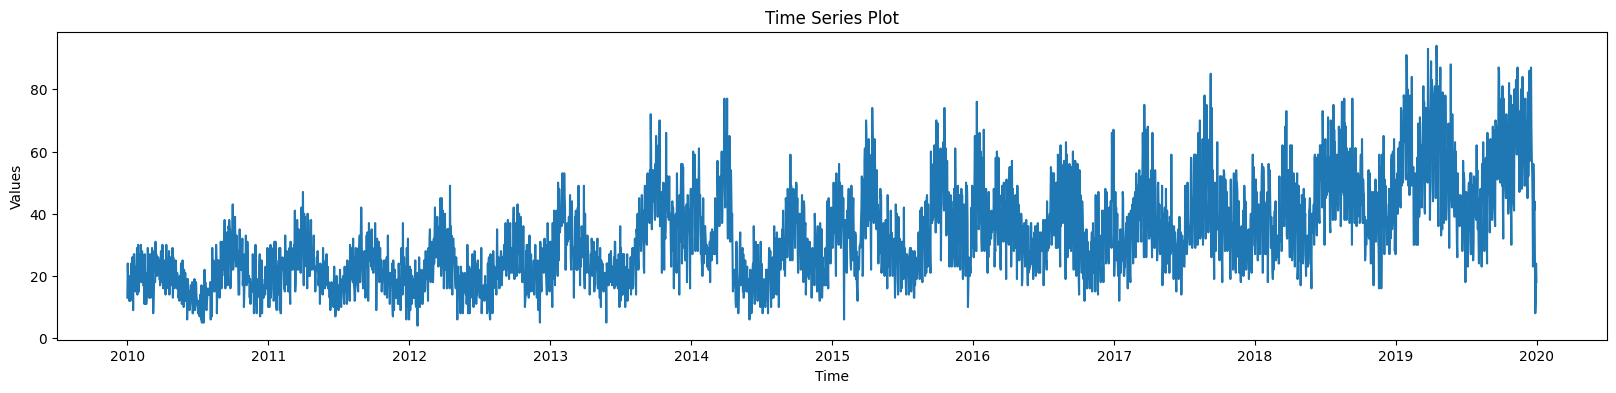

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
plt.plot(df1['count'])
plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

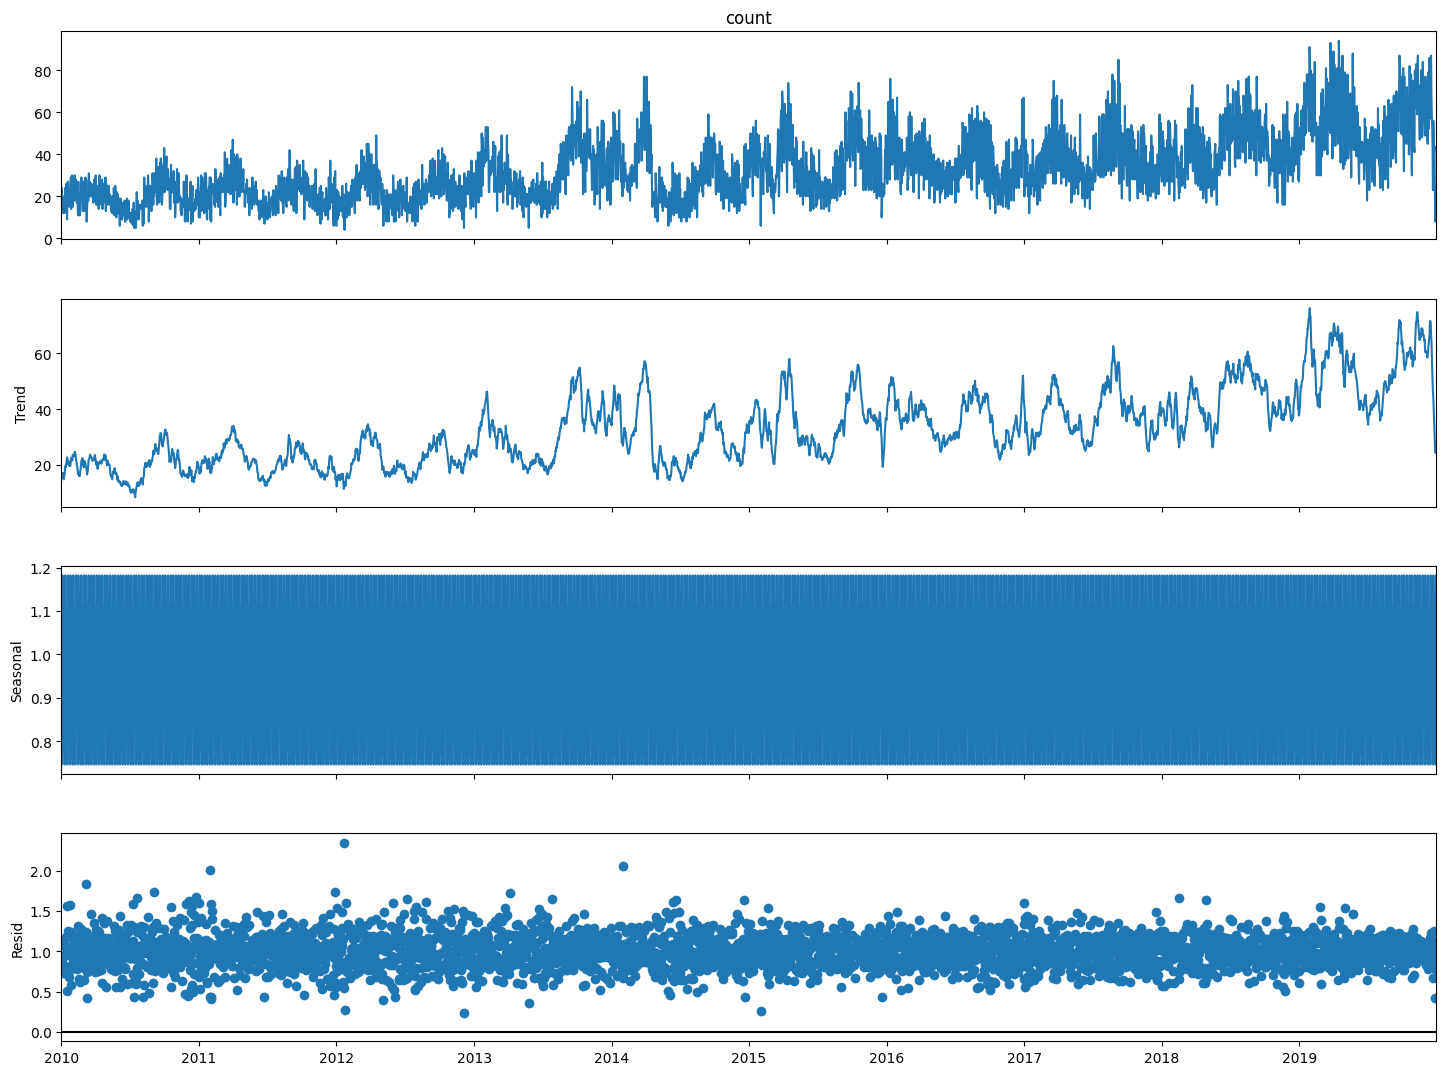

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Giả sử dữ liệu có chu kỳ lặp lại hàng tuần
result = seasonal_decompose(df1['count'], model='multiplicative', period=7)

fig = result.plot()
fig.set_size_inches(16, 12)

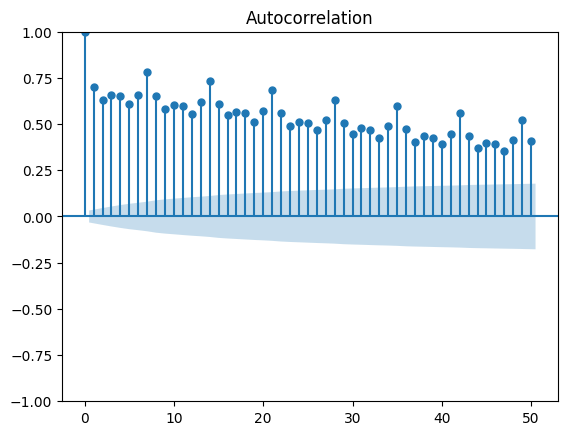

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1['count'], lags=50)
plt.show()

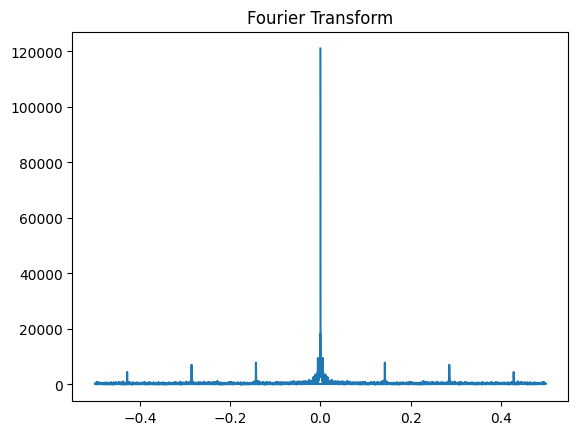

In [ ]:
import numpy as np
fft_result = np.fft.fft(df1['count'])
frequencies = np.fft.fftfreq(len(fft_result))

plt.plot(frequencies, np.abs(fft_result))
plt.title("Fourier Transform")
plt.show()

In [ ]:
len_data = len(df1)
len_data

3652

In [ ]:
len_train = int(len_data * 0.9)
len_test = len_data - len_train


train = df1.iloc[:len_train]
test = df1.iloc[len_train:]

train_data = train['count']
test_data = test['count']

# train_data = np.array(train_data)


from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.641685
p-value: 0.000108


In [ ]:
train_data

,count
date,
2010-01-01,13
2010-01-02,24
2010-01-03,19
2010-01-04,15
2010-01-05,17
...,...
2018-12-26,44
2018-12-27,64
2018-12-28,49


In [ ]:
from pmdarima import auto_arima

# Tìm tham số tối ưu với auto_arima
model = auto_arima(train_data,
                   seasonal=True,          # Bật tính mùa vụ
                   m=7,                   # Chu kỳ mùa vụ (ví dụ: 12 tháng trong năm)
                   trace=True,             # Hiển thị quá trình tìm kiếm
                   error_action='ignore',  # Bỏ qua lỗi khi thử nghiệm tham số
                   suppress_warnings=True, # Không hiển thị cảnh báo
                   stepwise=True)          # Sử dụng thuật toán tối ưu từng bước

# In ra kết quả
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=19.98 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=25361.790, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=24027.678, Time=2.96 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=23411.982, Time=3.67 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=25359.791, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=23792.230, Time=0.72 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=8.32 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=23204.552, Time=8.45 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=19.76 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=24769.718, Time=2.81 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=23185.263, Time=9.03 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=23390.176, Time=2.60 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=21.09 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=13.62 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=240

In [ ]:


# Huấn luyện mô hình với thông số tìm được
model = SARIMAX(train_data, order=(5, 1, 3), seasonal_order=(0, 0, 2, 52),
                enforce_stationarity=False, enforce_invertibility=False, low_memory=True)
results = model.fit(disp=False)

# Tóm tắt kết quả
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['low_memory']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                   count   No. Observations:                 3286
Model:             SARIMAX(5, 1, 3)x(0, 0, [1, 2], 52)   Log Likelihood              -11182.500
Date:                                 Sun, 01 Dec 2024   AIC                          22386.999
Time:                                         09:08:38   BIC                          22453.700
Sample:                                     01-01-2010   HQIC                         22410.922
                                          - 12-30-2018                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3636      0.026    -13.759      0.000      -0.415      -0

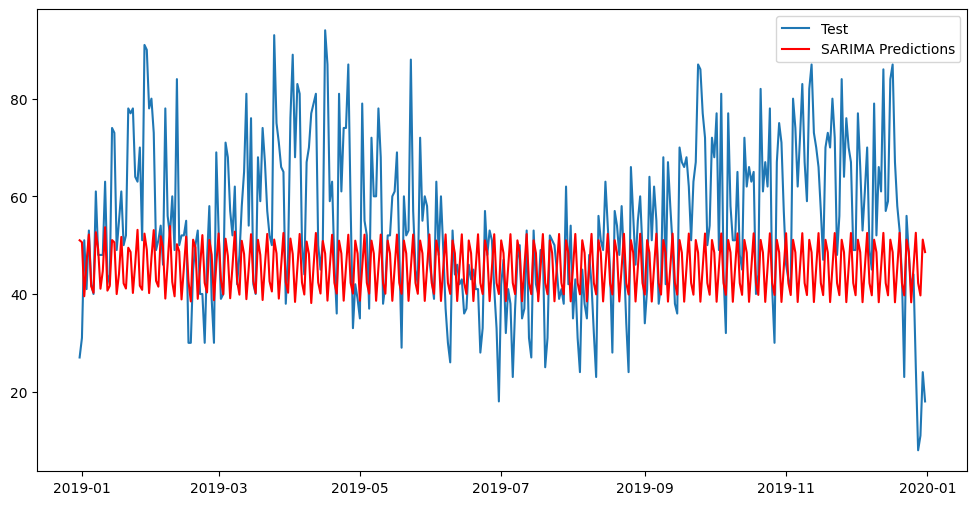

MAE: 13.980519676208356
RMSE: 17.862435249478512
2018-12-31    51.000374
2019-01-01    50.594177
2019-01-02    39.534290
2019-01-03    46.588939
2019-01-04    52.182335
                ...    
2019-12-27    52.535535
2019-12-28    42.237787
2019-12-29    39.706492
2019-12-30    51.135049
2019-12-31    48.581900
Freq: D, Name: predicted_mean, Length: 366, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
# plt.plot(train.index, train_data, label='Train')
plt.plot(test.index, test_data, label='Test')
plt.plot(predictions.index, predictions, label='SARIMA Predictions', color='red')
plt.legend()
plt.show()

# Tính toán lỗi
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(predictions)